In [3]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 한글설정 & 마이너스표시
plt.rc('font',family='Malgun Gothic') 
plt.rc('axes',unicode_minus=False)

In [5]:
titanic = sns.load_dataset('titanic')

In [38]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## 승객의 생존 여부별로 각각의 수를 막대 그래프로 나타내시오

<Axes: title={'center': '승객의 생존 여부'}, xlabel='survived'>

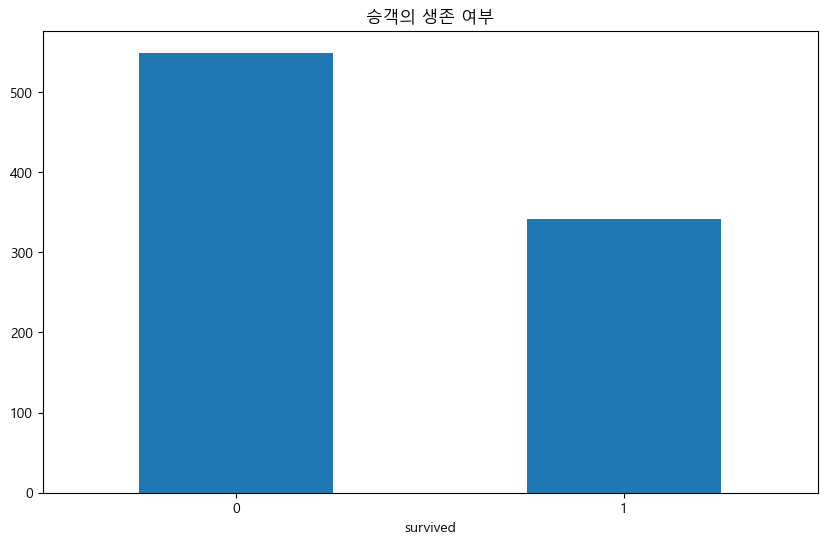

In [160]:
plt.figure(figsize=(10,6))
plt.title('승객의 생존 여부')
titanic['survived'].value_counts().plot.bar(rot=0)

## 승객들의 연령 분포를 히스토그램으로 나타내시오

<Axes: title={'center': '승객의 연령 분포'}>

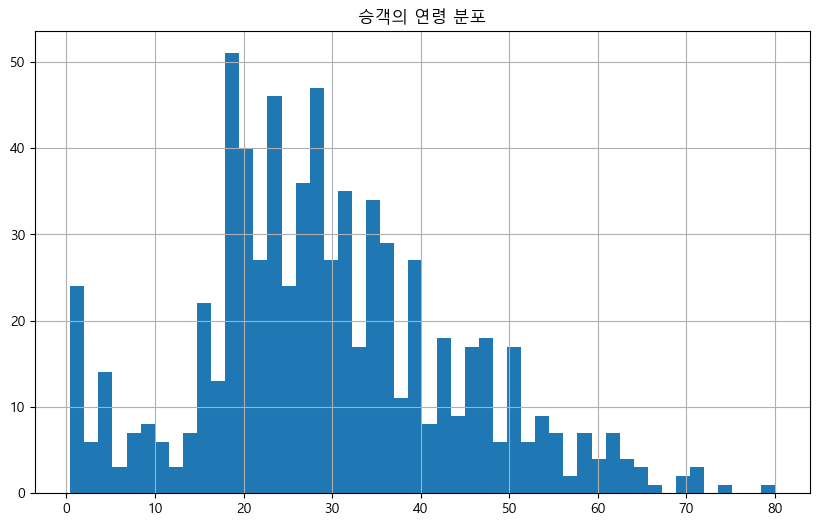

In [162]:
plt.figure(figsize=(10,6))
plt.title('승객의 연령 분포')
titanic['age'].hist(bins=50)

## 연령대별 생존자 수의 변화를 선 그래프로 나타내세요

<Axes: title={'center': '연령대별 생존자 수'}, xlabel='age_group', ylabel='survived'>

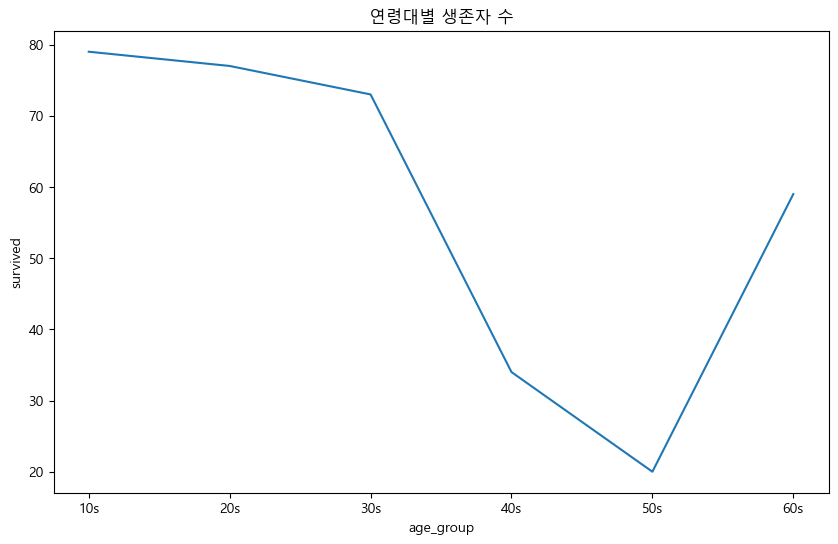

In [178]:
# 연령대를 만들기 위한 함수 정의
def age_group(age):
    if age < 20:
        return '10s'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    else:
        return '60s'

# 연령대 열 추가
titanic['age_group'] = titanic['age'].apply(age_group)

plt.figure(figsize=(10,6))
plt.title('연령대별 생존자 수')
sum = titanic.groupby('age_group')['survived'].sum()
sns.lineplot(data=sum)

## 승객의 연령과 요금을 축으로 하는 스캐터 플롯을 그리고 생존 여부에 따라 색상을 달리하세요

<Axes: title={'center': '승객의 연령, 요금과 생존 여부의 상관관계'}, xlabel='age', ylabel='fare'>

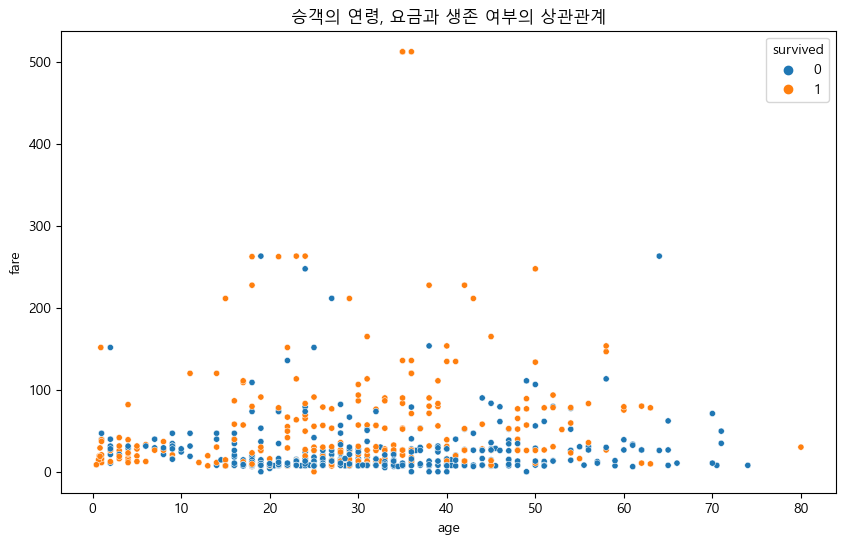

In [180]:
plt.figure(figsize=(10,6))
plt.title('승객의 연령, 요금과 생존 여부의 상관관계')
sns.scatterplot(titanic, x='age', y='fare', hue='survived', s=20)

## 각 클래스별 승객의 연령 분포를 박스 플롯으로 나타내세요

<Axes: title={'center': '클래스별 승객의 연령 분포'}, xlabel='class', ylabel='age'>

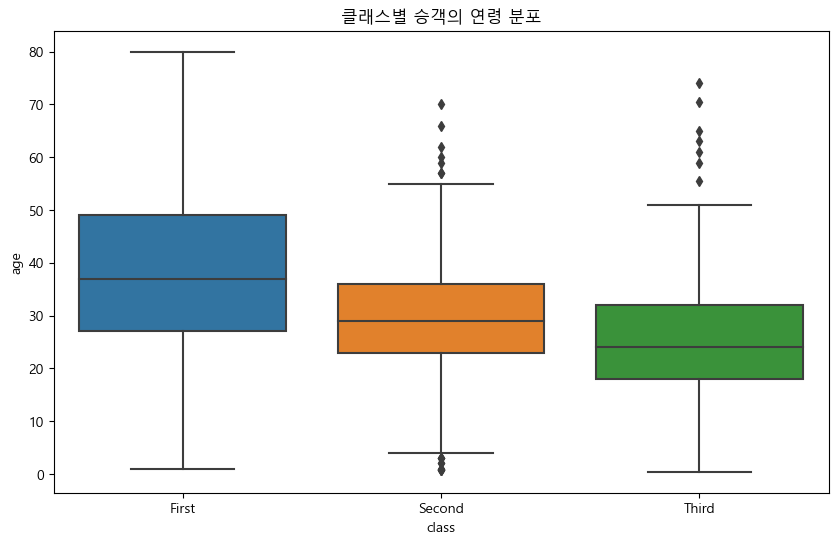

In [181]:
plt.figure(figsize=(10,6))
plt.title('클래스별 승객의 연령 분포')
sns.boxplot(titanic, x='class', y='age')

## 각 클래스별 승객 수를 도넛 차트로 시각화하세요

<Axes: title={'center': '클래스별 승객의 수'}, ylabel='count'>

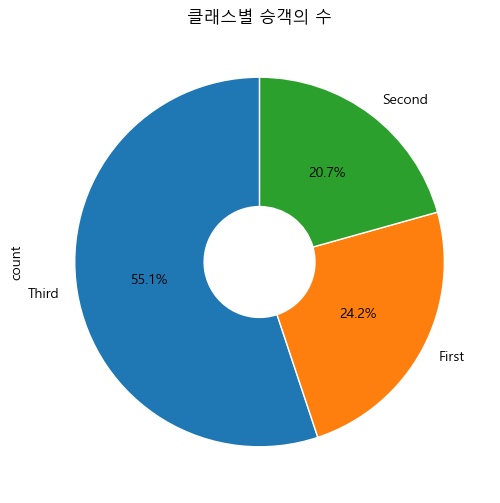

In [196]:
plt.title('클래스별 승객의 수')
wedgeprops={'width': 0.7, 'edgecolor': 'w'}
titanic['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops, figsize=(10,6))

## 각 클래스에서의 생존자와 사망자 수를 스택드 바 차트로 나타내세요

Text(0.5, 1.0, '클래스별 생존자와 사망자 수')

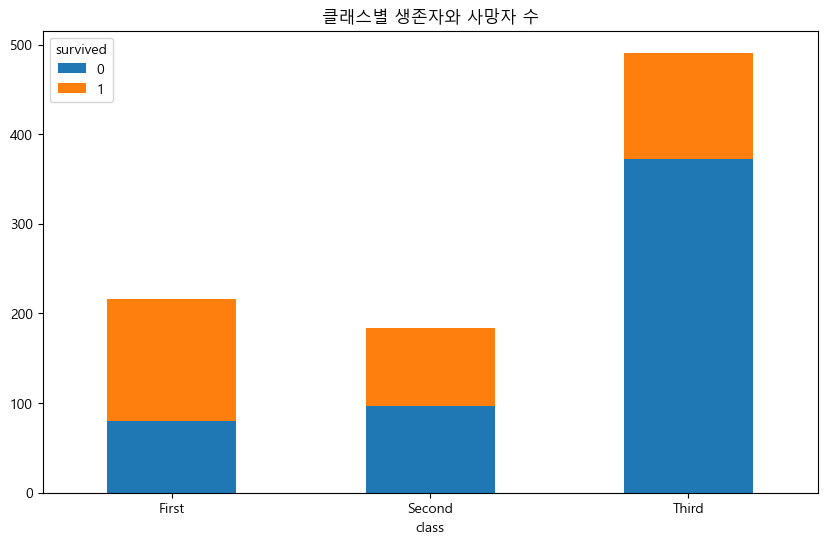

In [194]:
class_survived = titanic.groupby(['class', 'survived']).size().unstack()
class_survived.plot(kind='bar', stacked=True, rot=0, figsize=(10,6))
plt.title('클래스별 생존자와 사망자 수')

## 연령대, 요금, 생존 여부를 이용하여 버블 차트를 만드세요.각 버블의 크기는 승객 수에 따라 다르게 하세요.

<Axes: title={'center': '승객의 연령대, 요금, 생존 여부의 상관관계'}, xlabel='age', ylabel='fare'>

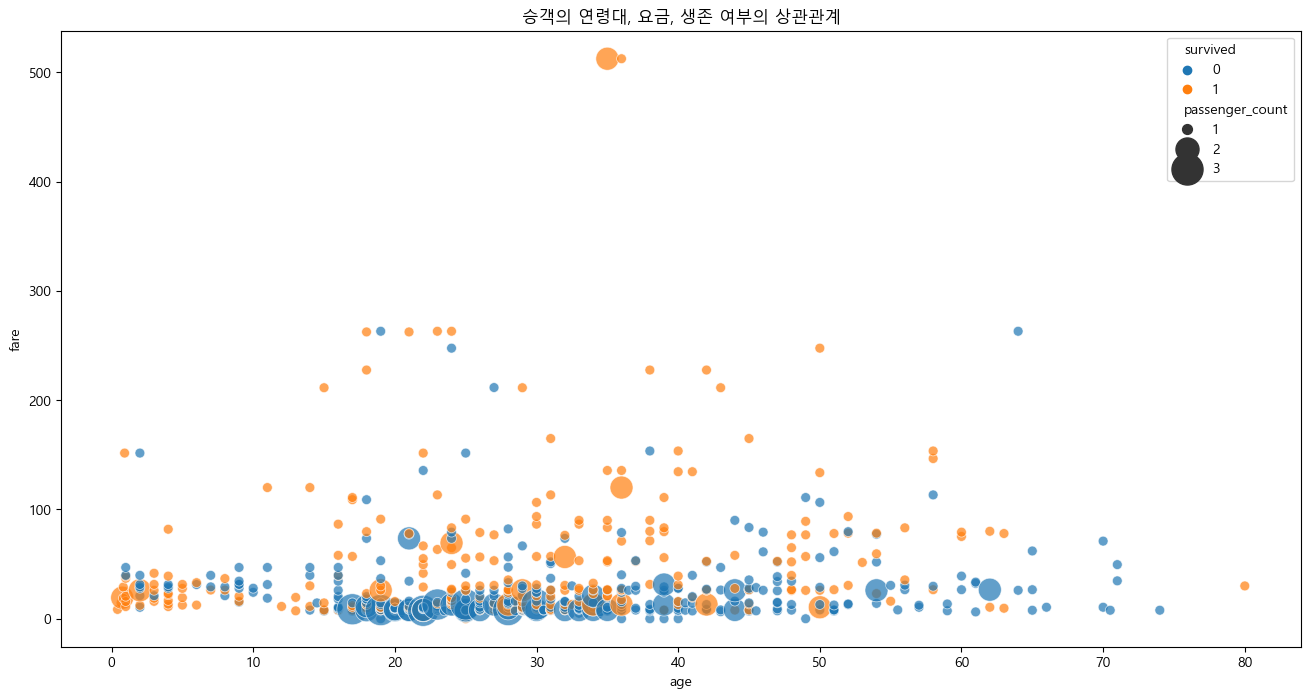

In [201]:
plt.figure(figsize=(16,8))
plt.title('승객의 연령대, 요금, 생존 여부의 상관관계')
size = titanic.groupby(['age', 'fare', 'survived']).size().reset_index(name='passenger_count')
sns.scatterplot(data=size, x='age', y='fare', size='passenger_count', hue='survived', sizes=(50, 500), alpha=0.7)

## 탑승 항구별 승객 분포를 파이 차트로 나타내세요

<Axes: title={'center': '탑승 항구별 승객 분포'}, ylabel='count'>

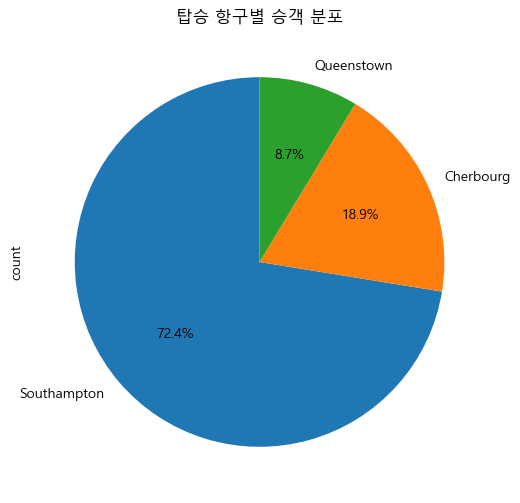

In [200]:
plt.figure(figsize=(10,6))
plt.title('탑승 항구별 승객 분포')
titanic['embark_town'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)

## 클래스별, 성별 생존율을 히트맵으로 시각화하세요

<Axes: title={'center': '클래스별, 성별 생존율'}, xlabel='sex', ylabel='class'>

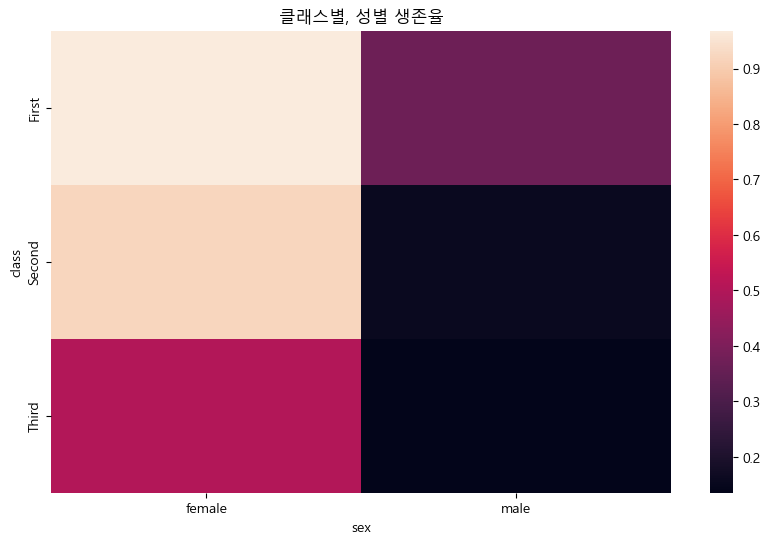

In [199]:
plt.figure(figsize=(10,6))
plt.title('클래스별, 성별 생존율')
rate = titanic.groupby(['class', 'sex'])['survived'].mean().unstack()
sns.heatmap(rate)

## 연령, 클래스, 요금, 생존 여부를 포함하여 다변량 데이터 관계를 페어 플롯으로 나타내세요

D:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


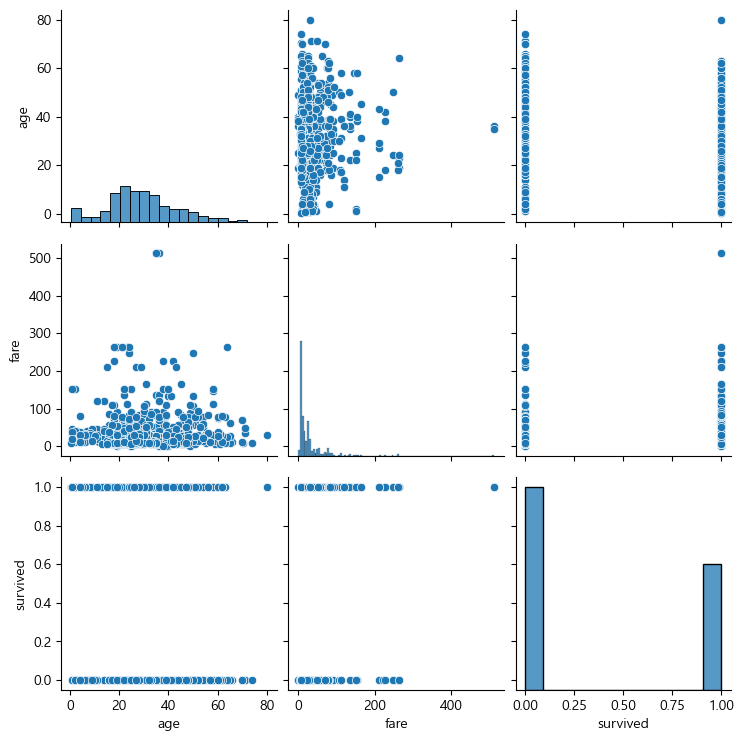

In [203]:
sns.pairplot(titanic[['age', 'class', 'fare', 'survived']])
plt.subplots_adjust(hspace=.1)

## 클래스와 성별에 따른 요금 분포를 바이올린 플롯으로 시각화하세요

<Axes: title={'center': '클래스별, 성별 생존율'}, xlabel='class', ylabel='fare'>

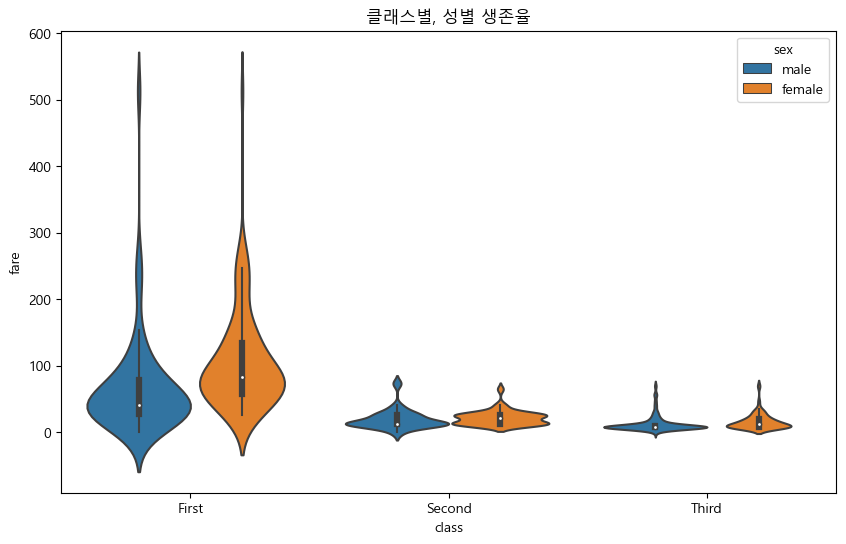

In [204]:
plt.figure(figsize=(10,6))
plt.title('클래스별, 성별 생존율')
sns.violinplot(titanic, x='class', y='fare', hue='sex')

## 연령대별 평균 요금 변화를 라인 플롯으로 나타내세요

<Axes: title={'center': '연령대별 평균 요금'}, xlabel='age_group', ylabel='fare'>

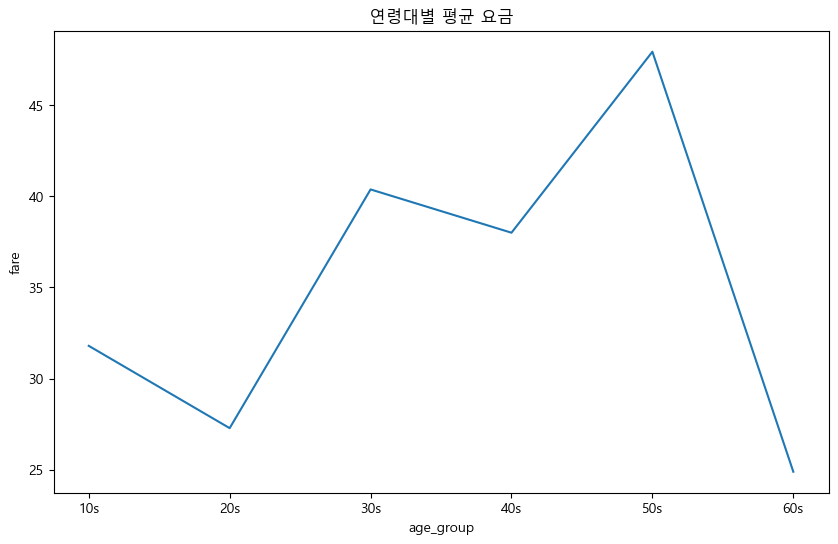

In [206]:
plt.figure(figsize=(10,6))
plt.title('연령대별 평균 요금')
avg = titanic.groupby('age_group')['fare'].mean()
sns.lineplot(data=avg)

## 서브플롯을 활용한 연령대 및 성별 생존율 비교

### 각 클래스별로 서브 플롯을 생성하세요. 각 서브플롯 안에서 남성과 여성 승객의 연령대별 (예: 0-10, 11-20, 21-30 등) 생존율을 바 차트로 비교하세요.

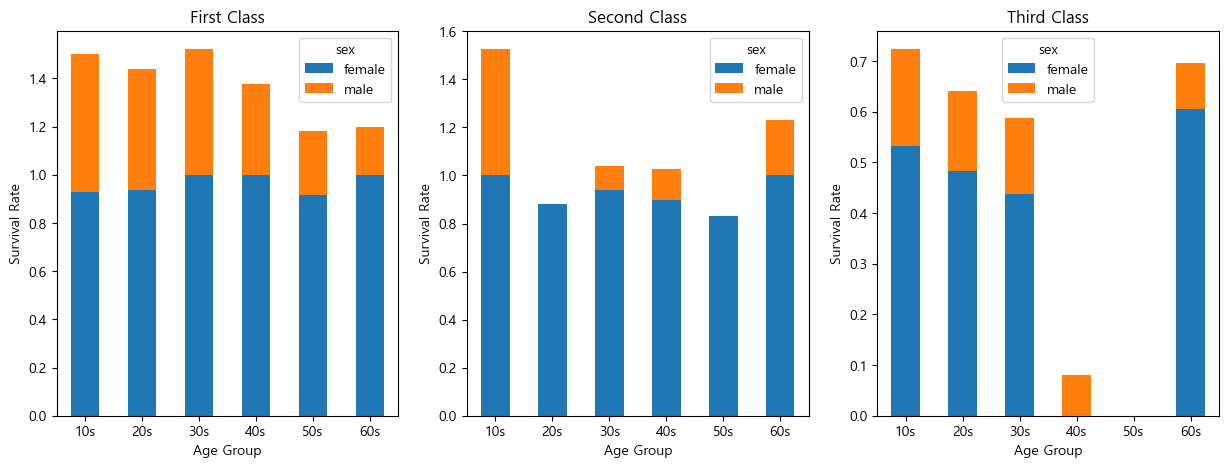

In [234]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

class_names = ['First', 'Second', 'Third']

for i in range(len(class_names)):
    class_name = class_names[i]
    class_data = titanic[titanic['class'] == class_name]
    class_survival_rate = class_data.groupby(['age_group', 'sex'])['survived'].mean().unstack()
    class_survival_rate.plot(kind='bar', ax=axes[i], stacked=True, rot=0)
    axes[i].set_title(f'{class_name} Class')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Survival Rate')

### 이 문제에서는 각 클래스 (1등석. 2등석, 3등석)를 나타내는 세 개의 서브플롯을 만들고, 각 서브플롯 내에서는 성별에 따른 연령대별 생존율을 막대 그래프로 표시합니다. 성별을 색상으로 구분하여 표시하세요.

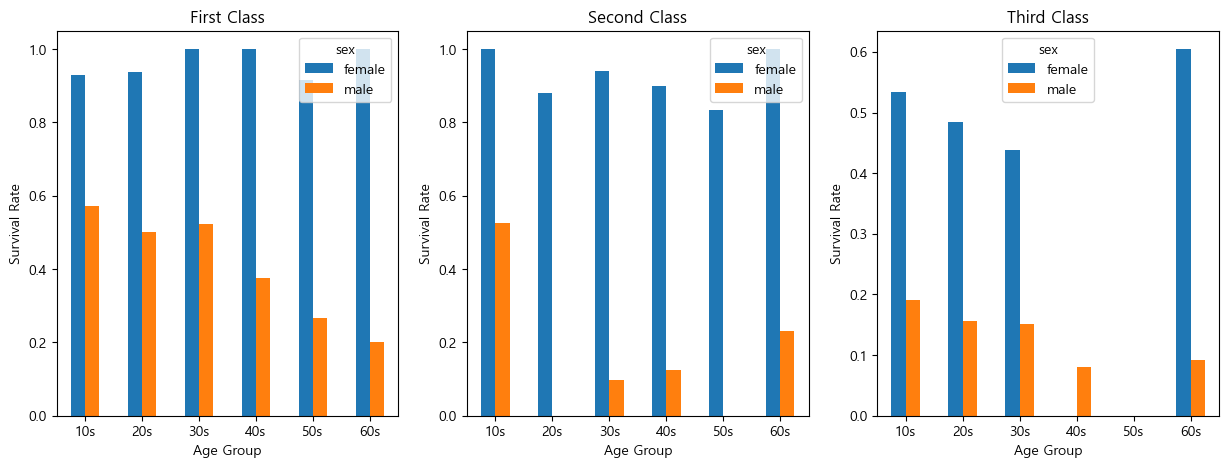

In [235]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(len(class_names)):
    class_name = class_names[i]
    class_data = titanic[titanic['class'] == class_name]

    age_group_survival_rate = class_data.groupby(['age_group', 'sex'])['survived'].mean().unstack()
    
    age_group_survival_rate.plot(kind='bar', ax=axes[i], rot=0)
    
    axes[i].set_title(f'{class_name} Class')
    axes[i].set_xlabel('Age Group')
    axes[i].set_ylabel('Survival Rate')